In [1]:
# Don't do this. Do as I say and not as I code.
import sys
sys.path.insert(0, "../") 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import (coordinates as coord, units as u)
from astroquery.simbad import Simbad
from astropy.io import fits
from astropy.table import Table

from mpl_utils import mpl_style

plt.style.use(mpl_style)

%matplotlib inline

In [2]:
GALAH_CATALOG_PATH = "../catalogs/GALAH_DR2.1_catalog.fits"
#galah = fits.open(GALAH_CATALOG_PATH)[1].data
galah = Table.read(GALAH_CATALOG_PATH)

('star_id',
 'sobject_id',
 'gaia_dr2_id',
 'ndfclass',
 'field_id',
 'raj2000',
 'dej2000',
 'jmag',
 'hmag',
 'kmag',
 'vmag_jk',
 'e_jmag',
 'e_hmag',
 'e_kmag',
 'snr_c1',
 'snr_c2',
 'snr_c3',
 'snr_c4',
 'rv_synt',
 'e_rv_synt',
 'rv_obst',
 'e_rv_obst',
 'rv_nogr_obst',
 'e_rv_nogr_obst',
 'chi2_cannon',
 'sp_label_distance',
 'flag_cannon',
 'teff',
 'e_teff',
 'logg',
 'e_logg',
 'fe_h',
 'e_fe_h',
 'vmic',
 'e_vmic',
 'vsini',
 'e_vsini',
 'alpha_fe',
 'e_alpha_fe',
 'li_fe',
 'e_li_fe',
 'flag_li_fe',
 'c_fe',
 'e_c_fe',
 'flag_c_fe',
 'o_fe',
 'e_o_fe',
 'flag_o_fe',
 'na_fe',
 'e_na_fe',
 'flag_na_fe',
 'mg_fe',
 'e_mg_fe',
 'flag_mg_fe',
 'al_fe',
 'e_al_fe',
 'flag_al_fe',
 'si_fe',
 'e_si_fe',
 'flag_si_fe',
 'k_fe',
 'e_k_fe',
 'flag_k_fe',
 'ca_fe',
 'e_ca_fe',
 'flag_ca_fe',
 'sc_fe',
 'e_sc_fe',
 'flag_sc_fe',
 'ti_fe',
 'e_ti_fe',
 'flag_ti_fe',
 'v_fe',
 'e_v_fe',
 'flag_v_fe',
 'cr_fe',
 'e_cr_fe',
 'flag_cr_fe',
 'mn_fe',
 'e_mn_fe',
 'flag_mn_fe',
 'co_fe',
 'e

In [4]:
galah

star_id,sobject_id,gaia_dr2_id,ndfclass,field_id,raj2000,dej2000,jmag,hmag,kmag,vmag_jk,e_jmag,e_hmag,e_kmag,snr_c1,snr_c2,snr_c3,snr_c4,rv_synt,e_rv_synt,rv_obst,e_rv_obst,rv_nogr_obst,e_rv_nogr_obst,chi2_cannon,sp_label_distance,flag_cannon,teff,e_teff,logg,e_logg,fe_h,e_fe_h,vmic,e_vmic,vsini,e_vsini,alpha_fe,e_alpha_fe,li_fe,e_li_fe,flag_li_fe,c_fe,e_c_fe,flag_c_fe,o_fe,e_o_fe,flag_o_fe,na_fe,e_na_fe,flag_na_fe,mg_fe,e_mg_fe,flag_mg_fe,al_fe,e_al_fe,flag_al_fe,si_fe,e_si_fe,flag_si_fe,k_fe,e_k_fe,flag_k_fe,ca_fe,e_ca_fe,flag_ca_fe,sc_fe,e_sc_fe,flag_sc_fe,ti_fe,e_ti_fe,flag_ti_fe,v_fe,e_v_fe,flag_v_fe,cr_fe,e_cr_fe,flag_cr_fe,mn_fe,e_mn_fe,flag_mn_fe,co_fe,e_co_fe,flag_co_fe,ni_fe,e_ni_fe,flag_ni_fe,cu_fe,e_cu_fe,flag_cu_fe,zn_fe,e_zn_fe,flag_zn_fe,y_fe,e_y_fe,flag_y_fe,ba_fe,e_ba_fe,flag_ba_fe,la_fe,e_la_fe,flag_la_fe,eu_fe,e_eu_fe,flag_eu_fe
,,,,,deg,deg,mag,mag,mag,mag,mag,mag,mag,,,,,km / s,km / s,km / s,km / s,km / s,km / s,,,,K,K,log(cm/s**2),log(cm/s**2),,,km / s,km / s,km / s,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
str16,int64,int64,str12,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64
00000011+0522500,170910004101274,2745049530295263232,MFOBJECT,6882,0.00047,5.380571,11.247,10.662,10.539,13.29013142182967,0.023,0.021,0.019,21.6842438247,25.642019541,48.2577818878,56.7736953398,11.2785006196,0.10554313024226696,nan,nan,nan,nan,0.9686406055148505,26.117479302928928,1,4576.3146556900165,73.66606152161543,4.69921301415962,0.20325334996983807,-0.34715658604637595,0.0858256649316195,1.0402612320260698,0.04780623250819824,5.842923719979717,1.137324347810317,nan,nan,0.08814637856703222,0.036974729677661515,9,0.1767276669285896,0.12066299569491594,7,0.917111108763486,0.12488473782575324,7,-0.02697108553652898,0.05739079406012904,3,-0.27784443564094446,0.09104559780809049,3,0.1192836438175516,0.05014576539801681,3,-0.5213135214004853,0.08367885808642318,4,-0.07828451329189948,0.1105459049204072,3,0.2636871283785336,0.06430052174371603,3,0.24947225252755315,0.05430142402788317,3,0.1993616391387553,0.04245711713403249,3,0.5272384234558806,0.06819817858156826,3,-0.017008873233296695,0.06848921533230523,3,-0.28099685115686907,0.07106827513025585,3,-0.032079478105687516,0.05902655519022573,3,0.09768408598746328,0.07118604779902064,3,0.03449119709150463,0.0675336516468829,3,-0.316891222233664,0.08378329657164789,4,0.2800804604999586,0.09618677820229367,3,0.0020769516248465847,0.11050615030944015,3,0.1513767947925168,0.06994674998573366,7,0.06383755210346904,0.14885420501563815,7
00000023-5709445,161116001701360,4922452332795612416,MFOBJECT,6863,0.000961,-57.162365,12.219,11.707,11.614,13.962700850910407,0.023,0.025,0.023,35.4352269965,44.8624165399,77.100807268,61.57035197,-17.0524752475,0.22204866610544016,nan,nan,nan,nan,1.1302555774403251,9.481671746009932,1,5168.714783718918,69.26343220626434,4.417376173707199,0.18537860563660696,-0.8399120515061285,0.07626677163678232,1.052628515431911,0.043236608109176955,8.310857910725424,1.0437913042541966,nan,nan,1.2327808340880901,0.034874843628975874,9,0.17228231706904168,0.09017881957321548,7,0.5019640877763372,0.11119965231157877,7,-0.024790781231829796,0.0519223318192827,3,0.277602119753392,0.08199969469069114,3,0.2546160563668588,0.04535553578385894

In [45]:
# galah-clusters.csv created from http://gigli.fmf.uni-lj.si/daiquiri/query
# using:
# SELECT * FROM `GALAH`.`sobject_clusterstars_1_0` WHERE 1;

galah_clusters = Table.read("../catalogs/galah-clusters.csv")
galah_clusters

row_id,sobject_id,cluster_name
int64,int64,str8
1,131118001101003,NGC288
2,131118001101013,NGC288
3,131118001101019,NGC288
4,131118001101020,NGC288
5,131118001101089,NGC288
6,131118001101091,NGC288
7,131118001101093,NGC288
8,131118001101102,NGC288
9,131118001101103,NGC288


In [46]:
set(galah_clusters["cluster_name"])

{'47 Tuc',
 'M30',
 'M67',
 'NGC1851',
 'NGC2243',
 'NGC2516',
 'NGC288',
 'NGC362',
 'NGC6362',
 'Pleiades',
 'omegaCen'}

In [90]:
def match_exact_sorted(a, b):
    ai, bi = (np.argsort(a), np.argsort(b))
    return (ai[np.in1d(a[ai], b[bi])], bi[np.in1d(b[bi], a[ai])])

cluster_idx, galah_idx = match_exact_sorted(
    galah_clusters["sobject_id"], galah["sobject_id"])

assert np.allclose(galah_clusters["sobject_id"][cluster_idx],
                   galah["sobject_id"][galah_idx])


In [92]:
set(galah_clusters[cluster_idx]["cluster_name"])

{'NGC2243', 'NGC2516', 'NGC362', 'NGC6362'}

<Angle [] deg>

In [93]:
galah_positions = coord.SkyCoord(ra=galah["raj2000"],dec=galah["dej2000"],
                                 unit=(u.deg, u.deg))

cluster_names = ("NGC 2243", "NGC 362")
c_kwds = dict(ra=[], dec=[])
for cluster_name in cluster_names:
    cluster = coord.SkyCoord.from_name(cluster_name)
    c_kwds["ra"].append(cluster.ra)
    c_kwds["dec"].append(cluster.dec)

clusters = coord.SkyCoord(**c_kwds)

In [99]:
idx_catalog, idx_cluster, d2d, d3d = clusters.search_around_sky(
    galah_positions, 1.0 * u.deg)

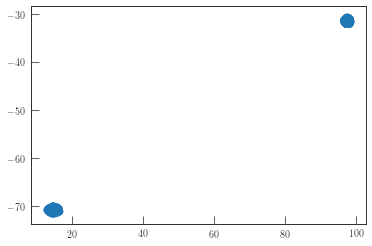

In [100]:
fig, ax = plt.subplots()
ax.scatter(galah_positions.ra[idx_catalog], galah_positions.dec[idx_catalog])

(5.014207295849446, -0.4359423357881168)

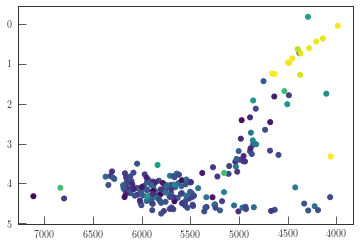

In [145]:
# Select candidates.
ngc362_candidate_idx = idx_catalog[idx_cluster == 1]
fig, ax = plt.subplots()
ax.scatter(galah["teff"][ngc362_candidate_idx],
           galah["logg"][ngc362_candidate_idx],
           c=galah["rv_synt"][ngc362_candidate_idx])
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])


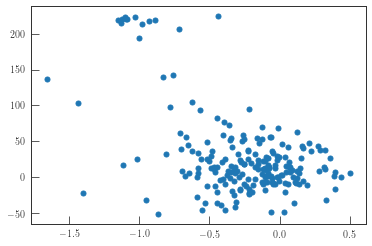

In [144]:
fig, ax = plt.subplots()
ax.scatter(galah["fe_h"][ngc362_candidate_idx],
           galah["rv_synt"][ngc362_candidate_idx])


In [120]:
from astroquery.gaia import Gaia
job = Gaia.launch_job("""
    SELECT * 
    FROM gaiadr2.gaia_source
    WHERE {0}""".format(" OR ".join(
        ["source_id = {0}".format(sid) for sid in galah["gaia_dr2_id"][ngc362_candidate_idx]])))
results = job.get_results()

/home/acas0005/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


Text(0.5,0,'rv')

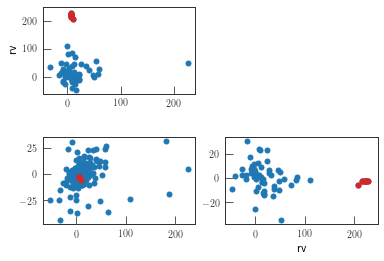

In [133]:
cand = results["radial_velocity"] > 200
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(results["pmra"], results["radial_velocity"])
axes[0, 0].scatter(results["pmra"][cand], results["radial_velocity"][cand],
                   c="tab:red")
axes[0, 0].set_ylabel('rv')

axes[1, 0].scatter(results["pmra"], results["pmdec"])
axes[1, 0].scatter(results["pmra"][cand], results["pmdec"][cand],
                   c="tab:red")
axes[0, 1].set_visible(False)
axes[1, 1].scatter(results["radial_velocity"], results["pmdec"])
axes[1, 1].scatter(results["radial_velocity"][cand], results["pmdec"][cand],
                   c="tab:red")
axes[1, 1].set_xlabel('rv')


In [136]:
ngc362_member_idx = np.in1d(galah["gaia_dr2_id"], results["source_id"][cand])


8

(3.5009592073923415, -0.12737023893332217)

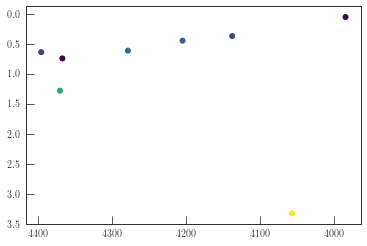

In [138]:
fig, ax = plt.subplots()
ax.scatter(galah["teff"][ngc362_member_idx], galah["logg"][ngc362_member_idx],
           c=galah["fe_h"][ngc362_member_idx])
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])

In [142]:
galah[ngc362_member_idx]

star_id,sobject_id,gaia_dr2_id,ndfclass,field_id,raj2000,dej2000,jmag,hmag,kmag,vmag_jk,e_jmag,e_hmag,e_kmag,snr_c1,snr_c2,snr_c3,snr_c4,rv_synt,e_rv_synt,rv_obst,e_rv_obst,rv_nogr_obst,e_rv_nogr_obst,chi2_cannon,sp_label_distance,flag_cannon,teff,e_teff,logg,e_logg,fe_h,e_fe_h,vmic,e_vmic,vsini,e_vsini,alpha_fe,e_alpha_fe,li_fe,e_li_fe,flag_li_fe,c_fe,e_c_fe,flag_c_fe,o_fe,e_o_fe,flag_o_fe,na_fe,e_na_fe,flag_na_fe,mg_fe,e_mg_fe,flag_mg_fe,al_fe,e_al_fe,flag_al_fe,si_fe,e_si_fe,flag_si_fe,k_fe,e_k_fe,flag_k_fe,ca_fe,e_ca_fe,flag_ca_fe,sc_fe,e_sc_fe,flag_sc_fe,ti_fe,e_ti_fe,flag_ti_fe,v_fe,e_v_fe,flag_v_fe,cr_fe,e_cr_fe,flag_cr_fe,mn_fe,e_mn_fe,flag_mn_fe,co_fe,e_co_fe,flag_co_fe,ni_fe,e_ni_fe,flag_ni_fe,cu_fe,e_cu_fe,flag_cu_fe,zn_fe,e_zn_fe,flag_zn_fe,y_fe,e_y_fe,flag_y_fe,ba_fe,e_ba_fe,flag_ba_fe,la_fe,e_la_fe,flag_la_fe,eu_fe,e_eu_fe,flag_eu_fe
,,,,,deg,deg,mag,mag,mag,mag,mag,mag,mag,,,,,km / s,km / s,km / s,km / s,km / s,km / s,,,,K,K,log(cm/s**2),log(cm/s**2),,,km / s,km / s,km / s,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
str16,int64,int64,str12,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64
00582635-7038546,140806004701365,4691634846074540160,MFOBJECT,32,14.609804,-70.648506,10.611,9.908,9.789,13.038335095362816,0.027,0.021,0.019,37.108427378,52.1585881137,68.3927161136,106.714687173,207.327112517,0.1820223478059514,208.54,0.129,208.567,0.129,1.6865349843195898,1.1559631639954868,0,4370.448160286359,75.43041598721624,1.2777701837670397,0.1790127400103628,-0.7173152744701581,0.0729236677365245,1.4486003557657923,0.04161868936111826,7.429257970764211,1.0103146963263028,0.12485924406610165,0.030225330214463435,-0.5662051980963333,0.05423574561783343,7,-0.4018877507591625,0.03350521990564636,5,0.1838255252820023,0.10942382059651151,4,0.038118234466681056,0.049993579052530074,0,0.07018798280245375,0.07886147228125204,0,0.08617997247009217,0.04366277527811653,0,0.07739527639613028,0.07214473943317756,0,0.09141256960553412,0.09406486146953111,0,0.007669830323304358,0.05525155477985892,1,0.009742414877301278,0.046566237778542276,0,0.14900696132369376,0.03671897407932644,0,0.3708168719634035,0.05811604222232567,2,0.007449249464280808,0.05778134650087879,0,-0.01110032402152844,0.06131252719579366,0,-0.023397466335395828,0.05039325033007185,2,0.0017721560422251093,0.062486082082899755,0,-0.16491796941101466,0.058621135079944535,0,-0.24094824729359973,0.07361516599067953,0,-0.13269227576513237,0.08203265410822413,0,0.10096501868660399,0.09569664799732273,2,0.12088463708748623,0.0494144125395042,2,0.1905334960939429,0.053789272702925175,2
01021360-7052409,140806004701006,4690886314878307328,MFOBJECT,32,15.556676,-70.878036,10.137,9.361,9.244,12.837550282401747,0.027,0.025,0.019,44.4685618112,71.8330727477,96.3194415305,121.807223379,217.309405941,0.5369783018564888,nan,nan,nan,nan,3.913991427944651,11.09314542334221,1,4204.5453002712475,84.67923470976571,0.44278498655210985,0.16291518781558492,-0.9317913735847174,0.06462124486157837,1.7542303263011403,0.037551280261332316,9.478206532335825,0.925340478489944,nan,nan,-0.6347921794030976,2.1675986378728997,9,-0.32568900502616316,0.04529859530074234,7,0.30680454876537866,0.21046298076057307,7,-0.011129548450233138,0.04522584091072373,3,-0.137771297316222

(array([6.8]), array([16.8]))

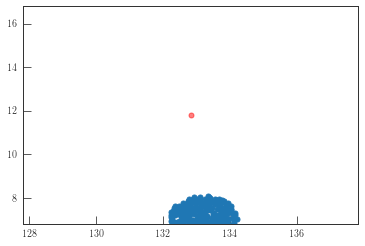

In [44]:
fig, ax = plt.subplots()
ax.scatter(galah_positions.ra, galah_positions.dec)
ax.scatter(m67.ra, m67.dec, c="r", alpha=0.5)
ax.set_xlim(m67.ra.value - 5, m67.ra.value + 5)
ax.set_ylim(m67.dec.value - 5, m67.dec.value + 5)


In [ ]:
>>> from astropy.coordinates import SkyCoord
>>> from astropy import units as u
>>> c = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)  
>>> catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)  
>>> idx, d2d, d3d = c.match_to_catalog_sky(catalog)  